In [347]:
#!/usr/bin/env python
# coding: utf-8

## Imports

In [348]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

In [349]:
os.listdir()

['analysis_clean.ipynb',
 'analysis_clean.py',
 'analysis_val.ipynb',
 'knn-cnn.png',
 'analysis_clean_test.ipynb',
 'analysis_amgad.ipynb']

## Initialization of dataset + training/testing set

In [350]:
n_features = 21
features = [f'attr{str(i)}' for i in range(1, n_features + 1)]
features.append('c')
ds = pd.read_csv('../waveform/waveform.data', names=features)

In [351]:
ds.describe()

attr1        attr2        attr3        attr4        attr5  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      0.005144     0.338746     0.672438     0.991610     1.310888   
std       1.010130     1.053657     1.187970     1.415239     1.678291   
min      -3.340000    -3.250000    -4.200000    -3.840000    -3.480000   
25%      -0.680000    -0.372500    -0.150000    -0.020000     0.037500   
50%       0.010000     0.340000     0.660000     0.940000     1.120000   
75%       0.690000     1.050000     1.460000     1.970000     2.540000   
max       3.940000     3.880000     4.720000     5.750000     6.500000   

             attr6        attr7        attr8        attr9       attr10  ...  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  ...   
mean      1.997306     2.661806     2.659228     2.672086     2.988668  ...   
std       1.814187     2.015774     1.746067     1.663277     1.531506  ...   
min      -2.760000    -3.320000    -3.520000    -3.380000    -1.790000  ...   
25%       0.590000     1.110000     1.390000     1.470000     1.880000  ...   
50%       1.860000     2.500000     2.720000     2.810000     3.000000  ...   
75%       3.340000     4.210000     3.940000     3.940000     4.080000  ...   
max       7.620000     8.760000     7.840000     7.900000     7.630000  ...   

            attr13       attr14       attr15       attr16       attr17  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      2.678908     2.648632     2.647668     2.000504     1.335032   
std       1.651588     1.760113     2.018768     1.810684     1.669949   
min      -2.610000    -2.820000    -2.560000    -2.990000    -3.560000   
25%       1.480000     1.360000     1.120000     0.640000     0.070000   
50%       2.830000     2.700000     2.490000     1.820000     1.200000   
75%       3.932500     3.980000     4.182500     3.330000     2.532500   
max       7.500000     7.750000     8.720000     7.860000     6.740000   

            attr18       attr19       attr20       attr21            c  
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
mean      1.000622     0.661482     0.357300    -0.021378     1.007800  
std       1.412815     1.197326     1.081337     0.997064     0.818946  
min      -4.080000    -3.500000    -3.570000    -3.880000     0.000000  
25%      -0.010000    -0.180000    -0.350000    -0.690000     0.000000  
50%       0.940000     0.620000     0.350000    -0.030000     1.000000  
75%       1.960000     1.470000     1.072500     0.660000     2.000000  
max       6.200000     5.280000     4.650000     4.010000     2.000000  

[8 rows x 22 columns]

In [352]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   attr1   5000 non-null   float64
 1   attr2   5000 non-null   float64
 2   attr3   5000 non-null   float64
 3   attr4   5000 non-null   float64
 4   attr5   5000 non-null   float64
 5   attr6   5000 non-null   float64
 6   attr7   5000 non-null   float64
 7   attr8   5000 non-null   float64
 8   attr9   5000 non-null   float64
 9   attr10  5000 non-null   float64
 10  attr11  5000 non-null   float64
 11  attr12  5000 non-null   float64
 12  attr13  5000 non-null   float64
 13  attr14  5000 non-null   float64
 14  attr15  5000 non-null   float64
 15  attr16  5000 non-null   float64
 16  attr17  5000 non-null   float64
 17  attr18  5000 non-null   float64
 18  attr19  5000 non-null   float64
 19  attr20  5000 non-null   float64
 20  attr21  5000 non-null   float64
 21  c       5000 non-null   int64  
dtype

We can notice that the dataset is already clean: no `NaN` values

[]

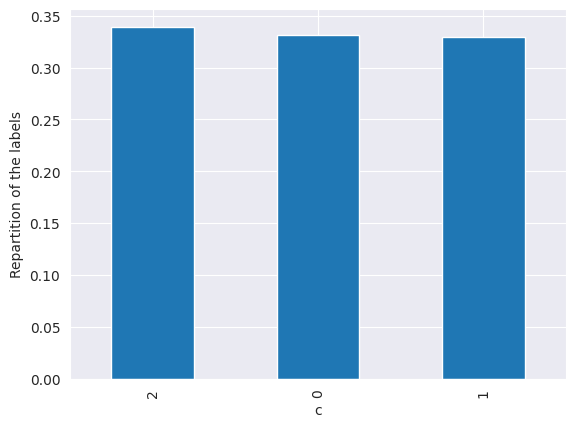

In [353]:
ds['c'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Repartition of the labels')
plt.plot()

In [354]:
y = ds['c'].copy()
X = ds.iloc[:, :n_features].copy()          

We will split training data and test data now, to avoid overfitting and bias. Ratio 4:1 for the training set

Undersampling methods (such as the CNN) will be only performed on the training set. While dimensionality reducing methods
such as PCAs would need to perform a PCA on the training set and only do the corresponding transformation on the test set.

the test set will be left untouched and unused until the end of the transformation pipeline

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # A static random state for troubleshooting

We will make a copy of the training set for the various modification we will perform, to then perform analysis over them
It will be as follows:
- `train_control`: no data reduction, no oversampling
- `train_cond`: training set modified by the Condensed Nearest Neighbor
- `train_imb`: training set with generated imbalancy,
- `train_imb_cond`: training set with generated imbalancy, modified by the CNN

In [356]:
X_train_control, y_train_control = X_train.copy(), y_train.copy()
X_train_cond, y_train_cond = X_train.copy(), y_train.copy()
X_train_imb, y_train_imb = X_train.copy(), y_train.copy()
X_train_imb_cond, y_train_imb_cond = X_train.copy(), y_train.copy()
X_train_pca, y_train_pca = X_train.copy(), y_train.copy()
X_test_pca, y_test_pca = X_test.copy(), y_test.copy()

---

Organization of the tasks:
5. Find the best k using cross-validation (both on the original dataset and the condensed dataset)
6. Perform Data Reduction (Reduced NN, Condensed NN),
2. Comparizon between the original dataset and the condensed dataset with a 1NN
3. 4. Generate imbalancy, analyze the impact of the imbalancy and the impact of using a CNN on an imbalanced dataset
3. Compare on the original dataset the time taken to fit and predict a 1NN using speed-up methods


5. If we have time, perform PCA over the original dataset and compare the impact on the curse of dimensionality

---

## Speed up calculations

---

## Data Imbalancy
We will perform oversampling on the dataset to generate imbalancy, that will have an impact on the performances of our model.

In [357]:
def smote(X, y, l_to_smote=None):
    if l_to_smote is None:
        l_to_smote = 0
    
    index = list(y[y == l_to_smote].index) # indexes of points with label `l_so_smoke`
    model = KNeighborsClassifier()
    model.fit(X, y.values.ravel())
    X_copy = X.copy()
    y_copy = y.copy()
    for i in range(200):
        temp = X[X.index == np.random.choice(index)]
        distance,neighbor=model.kneighbors(temp,n_neighbors=10)[0:2]
        distance = distance[0][1:]
        neighbor = neighbor[0][1:]
        for n in neighbor:
             if y.iloc[n] == l_to_smote:
                    ex_1 = (temp + X.iloc[n]) / 2
                    X_copy = pd.concat([X_copy,ex_1])
                    y_copy = pd.concat([y_copy,pd.Series(l_to_smote)])
    return X_copy,y_copy 

In [358]:
X_train_imb, y_train_imb = smote(X_train, y_train, l_to_smote=0)
X_train_imb_cond, y_train_imb_cond = smote(X_train, y_train, l_to_smote=0)

In [359]:
X_train_imb_cond

attr1  attr2  attr3  attr4  attr5  attr6  attr7  attr8  attr9  attr10  \
4227 -1.330  1.020  0.160  1.340  2.390  1.750  5.030  4.750  2.810   4.700   
4676  0.330  0.870 -0.490  1.230  0.120  0.060  1.220  0.750  0.070   3.480   
800  -1.560 -2.150  0.990 -0.280 -1.060  0.990  1.600  2.860  4.200   1.780   
3671 -0.030  1.510  1.330 -0.080 -1.200  0.910  2.160  3.480  4.210   4.400   
4193  1.360 -0.460 -0.990  1.090  0.900  1.850  2.930  3.000  3.420   4.710   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
4189  0.025  1.440  1.100 -0.035  0.815 -0.240  2.700  0.645  0.695   0.310   
4189  0.865  1.425  1.025 -0.370  1.010  0.345  2.700 -0.260  0.320   1.225   
4189  0.565  2.025  1.800  0.590  0.850  0.025  2.840  0.445  1.410   0.905   
4189  0.845  1.460  1.180 -0.390  1.025 -0.615  2.210 -0.350  1.690   0.310   
4189  1.220  1.585  1.225 -0.240  0.285 -1.110  3.215 -0.060  1.440   1.070   

      ...  attr12  attr13  attr14  attr15  attr16  attr17  attr18  attr19  \
4227  ...   4.990   1.040    2.15  -1.450  -0.290   0.260   1.940   1.010   
4676  ...   2.540   4.510    4.31   6.060   4.140   2.870   3.900   2.250   
800   ...   5.140   4.830    4.15   3.390   5.800   0.710   0.120  -0.420   
3671  ...   5.730   4.520    4.24   0.630  -0.700  -0.900  -0.060   0.150   
4193  ...   4.210   2.250    2.79  -0.470  -0.640  -0.370   0.650   0.380   
...   ...     ...     ...     ...     ...     ...     ...     ...     ...   
4189  ...   1.615   2.805    2.95   3.165   3.310   3.630   3.510   1.235   
4189  ...   1.980   2.255    2.45   3.505   3.305   3.795   2.845   1.340   
4189  ...   2.580   2.525    3.08   3.215   3.065   4.080   3.205   1.335   
4189  ...   2.270   2.230    3.24   3.700   3.410   4.590   2.535   1.695   
4189  ...   2.240   2.495    4.19   3.820   3.680   3.320   3.425   1.295   

      attr20  attr21  
4227  -1.990  -0.650  
4676   3.210  -0.020  
800   -0.640  -0.280  
3671  -0.890   1.090  
4193   1.450  -0.170  
...      ...     ...  
4189   0.890  -0.515  
4189   0.835  -0.710  
4189   0.850   0.325  
4189   0.775   1.060  
4189   0.625  -0.940  

[5264 rows x 21 columns]

In [360]:
y_train_imb_cond

4227    1
4676    0
800     2
3671    2
4193    1
       ..
0       0
0       0
0       0
0       0
0       0
Length: 5264, dtype: int64

In [361]:
print(X_train_imb.shape, y_train_imb.shape)
print(y_train_imb.value_counts())

(5342, 21) (5342,)
0    2666
2    1383
1    1293
Name: count, dtype: int64


---



## Tune the hyperparameter k

Optimal Bayes Classification rate = 86% accuracy

We also know that a good estimator for the hyperparameter k is $\sqrt{|S|}$

In [362]:
theoretical_k = round(np.sqrt(X_train_control.shape[0]))
print(theoretical_k)

63


In [363]:
def tune(X, y, k_min, k_max):
    assert k_min <= k_max, f'k_min should be less than k_max, got {k_min} while k_max = {k_max}'
    assert k_min > 0, f'k_min should be greater than 0, got {k_min} '
    print(X.shape)
    k_l = np.arange(k_min, k_max+1, 1)
    acc = [0]
    std = [0]
    
    for k in k_l:
        cross_val = cross_val_score(KNeighborsClassifier(n_neighbors=k), X=X, y=y, cv=10, scoring='accuracy')
        print(np.mean(cross_val))
        acc.append(np.mean(cross_val))
        std.append(np.std(cross_val))
        
    return acc, std

In [364]:
acc, std = tune(X_train, y_train, 1, 100)

(4000, 21)
0.77525
0.76475
0.8052499999999998
0.79325
0.8115
0.8077500000000001
0.8225000000000001
0.8220000000000001
0.83375
0.8314999999999999
0.8317500000000001
0.836
0.8387499999999999
0.8365
0.8387499999999999
0.842
0.8412499999999999
0.843
0.8400000000000001
0.84375
0.84475
0.8474999999999999
0.8472500000000001
0.8474999999999999
0.8452500000000001
0.84825
0.8494999999999999
0.85175
0.8467500000000001
0.8494999999999999
0.8450000000000001
0.84925
0.8465
0.8504999999999999
0.8460000000000001
0.851
0.8487500000000001
0.85125
0.85
0.8505
0.8497499999999999
0.8524999999999998
0.85
0.85125
0.85
0.85125
0.8504999999999999
0.8547499999999999
0.8494999999999999
0.8532500000000001
0.8497499999999999
0.85125
0.8497499999999999
0.8539999999999999
0.851
0.853
0.8504999999999999
0.8530000000000001
0.853
0.8545
0.8532499999999998
0.8549999999999999
0.853
0.8554999999999999
0.8545
0.8557500000000001
0.8564999999999999
0.8564999999999999
0.8557500000000001
0.85825
0.8547499999999999
0.857
0.8557

In [365]:
print(acc.index(max(acc)))
print(max(acc))

70
0.85825


In [366]:
acc_plus = np.add(acc, std)
acc_plus[acc_plus > 0.86] = 0.86
acc_minus = np.subtract(acc, std)

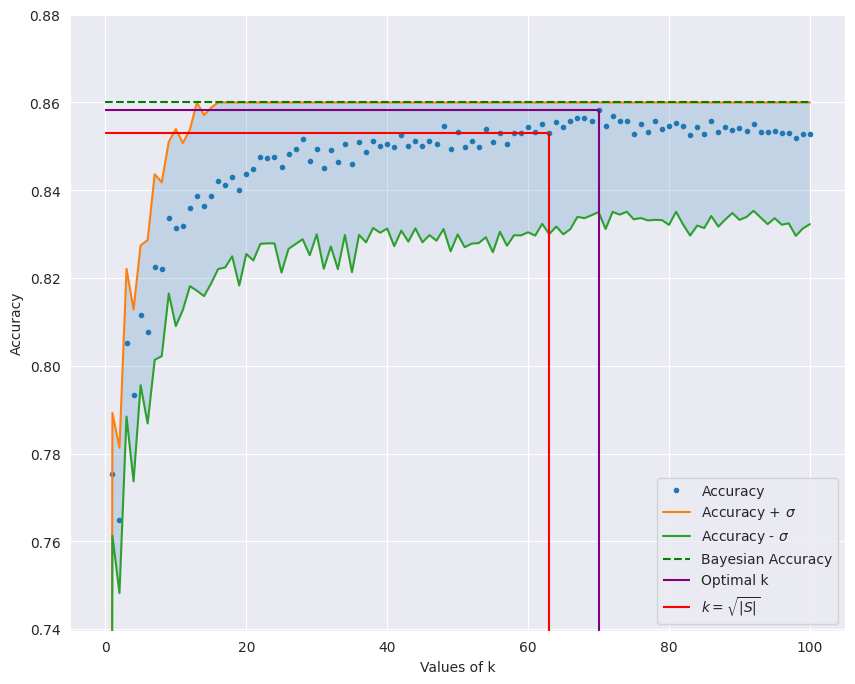

In [367]:
fig, ax = plt.subplots(figsize=(10, 8))
xaxis = list(range(0, 101))
ax.plot(xaxis, acc, '.', label='Accuracy')
ax.plot(xaxis, acc_plus,label='Accuracy + $\sigma$')
ax.plot(xaxis, acc_minus, label='Accuracy - $\sigma$')
ax.fill_between(xaxis, acc_plus, acc_minus, alpha=0.2)
ax.hlines(xmin=0, xmax=100 ,y=0.86, color='green',linestyle='--', label='Bayesian Accuracy')
ax.hlines(xmin=0, xmax=acc.index(max(acc)), y=max(acc), color='purple')
ax.hlines(xmin=0, xmax=theoretical_k, y=acc[theoretical_k], color='r')
ax.vlines(ymin = min(acc[1:]) - max(std[1:]), ymax=max(acc), x=acc.index(max(acc)), color='purple', label='Optimal k')
ax.vlines(ymin = min(acc[1:]) - max(std[1:]), ymax=acc[theoretical_k], x=theoretical_k, label='$k = \sqrt{|S|}$', color='r')
plt.ylim(min(acc[1:]) - max(std[1:]), 0.88)
plt.xlabel('Values of k')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

---

## Data Reduction

Since the KNN performance is highly impact by the size of the dataset, we will perform a data reduction algorithm (CNN) to ease the time taken by the KNN, while trying to conserve the accuracy of the model.

Each point can be either:
1. A prototype (points needed for accurate classification),
2. An outlier
3. An absorbed point (point correctly classified by prototypes)

Algorithm is as follows:

1. Find the outlier (incorrectly classified by a 1NN) and remove them from the dataset
2. Take a random point, add it to a storage dataset
3. Classify the dataset with the storage dataset. If a point is correctly classified, remove it from the dataset. If a poiint is missclassified, add it to the storage.

In [368]:
def reduce(x_1, y_1, x_2, y_2, model=None):
    if model is None:
        model = KNeighborsClassifier(n_neighbors=1)
    model.fit(x_1, y_1)
    y_pred = model.predict(x_2)
    miss = y_pred != y_2
    tot = np.sum(miss)
    return tot, x_2[~miss], y_2[~miss]

In [369]:
def remove_outliers(X, y, seed=None):
    if seed is None:
        seed = 42
    x1, x2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=seed)
    stabilization = False
    while not stabilization:
        model = KNeighborsClassifier(n_neighbors=1)
        tot1, x1, y1 = reduce(x2, y2, x1, y1, model)
        print(f'total removed from x1: {tot1}')
        tot2, x2, y2 = reduce(x1, y1, x2, y2, model)
        print(f'total removed from x2: {tot2}')
        if tot1 + tot2 == 0:
            stabilization = True
    newX, newY = pd.concat([x1, x2], axis='index').reset_index(drop=True, inplace=False), pd.concat([y1, y2],
                                                                                                    axis='index').reset_index(
        drop=True, inplace=False)
    return newX, newY.to_frame()

In [370]:
def well_classified(X, y, model):
    return model.predict(np.asarray(X).reshape(1, -1)) == y

In [371]:
def condensate(X: pd.DataFrame, y: pd.DataFrame):
    X_storage = pd.DataFrame()
    y_storage = pd.DataFrame()
    X_cond, y_cond = X.copy(), y.copy()
    print(y_cond.columns)
    index = y_cond.groupby('c').sample(n=1).index.values
    first_y = y_cond.loc[index]
    first_X = X_cond.loc[index]
    X_storage = pd.concat([X_storage, first_X], axis='columns')
    y_storage = pd.concat([y_storage, first_y], axis='columns')
    print(X_storage)
    print(y_storage)
    X_cond = X_cond.drop(index)
    y_cond = y_cond.drop(index)
    # print(X_storage.index.values)
    total = 0
    stabilization = False
    while not stabilization:
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(X_storage.values, y_storage.values.ravel())
        stabilization = True
        for count, i in enumerate(X_cond.index.to_list()):
            # print(count, i)
            X_curr = X_cond.loc[[i]]
            y_curr = y_cond.loc[[i]]
            y_pred = model.predict(X_curr.values)
            if y_pred[0] == y_curr.values[0][0]:
                continue
            print(f'Not ok: {i} of label {y_curr.values[0][0]} but got {y_pred[0]}')
            total += 1
            X_storage = pd.concat([X_storage, X_curr], axis='rows')
            y_storage = pd.concat([y_storage, y_curr], axis='rows')
            X_cond = X_cond.drop(i)
            y_cond = y_cond.drop(i)
            stabilization = False
            break
        print(f'Total added: {total}')
    return X_storage, y_storage

In [372]:
def pipeline_cnn(X, y):
    reduced_X, reduced_y = remove_outliers(X, y)
    condensed_X, condensed_y = condensate(reduced_X, reduced_y)
    return condensed_X, condensed_y

In [373]:
X_train_cond, y_train_cond = pipeline_cnn(X_train, y_train)
print(X_train_cond.shape, y_train_cond.shape)
print(X_train.shape, y_train.shape)

total removed from x1: 446
total removed from x2: 310
total removed from x1: 15
total removed from x2: 0
total removed from x1: 0
total removed from x2: 0
Index(['c'], dtype='object')
      attr1  attr2  attr3  attr4  attr5  attr6  attr7  attr8  attr9  attr10  \
2625  -2.69   0.72   2.02   0.20   0.99   0.38   1.04   0.96   0.98    1.56   
149   -0.45   1.82   0.67   3.98   0.87   1.44   1.47   2.73   4.50    2.72   
2697  -1.30   1.09   0.28  -0.26   0.30   0.68   3.15   2.01   1.43    2.44   

      ...  attr12  attr13  attr14  attr15  attr16  attr17  attr18  attr19  \
2625  ...    2.68    2.76    3.36    6.52    2.58    3.10    2.87    2.14   
149   ...    4.41    2.66    0.63   -0.14   -0.26    0.44    1.86    0.01   
2697  ...    4.34    3.51    3.74    3.95    3.16    2.38    0.23   -1.29   

      attr20  attr21  
2625    0.68    0.67  
149     2.10   -1.95  
2697    1.83    1.72  

[3 rows x 21 columns]
      c
2625  0
149   1
2697  2
Not ok: 1 of label 0 but got 2
Total added:

KeyboardInterrupt: 

In [ ]:
ds_cond = pd.concat([X_train_cond, y_train_cond], axis='columns')
ds_cond.info()

In [374]:
ds_cond.describe()

attr1       attr2       attr3       attr4       attr5       attr6  \
count  656.000000  656.000000  656.000000  656.000000  656.000000  656.000000   
mean     0.045854    0.356951    0.702043    0.973491    1.357043    1.988415   
std      1.032267    1.110389    1.179344    1.491361    1.712497    1.881795   
min     -3.250000   -2.960000   -3.420000   -2.640000   -2.600000   -2.190000   
25%     -0.622500   -0.362500   -0.090000   -0.062500    0.050000    0.487500   
50%      0.050000    0.340000    0.700000    0.860000    1.030000    1.705000   
75%      0.750000    1.140000    1.470000    2.015000    2.590000    3.462500   
max      3.170000    3.830000    4.390000    5.660000    6.500000    6.680000   

            attr7       attr8       attr9      attr10  ...      attr13  \
count  656.000000  656.000000  656.000000  656.000000  ...  656.000000   
mean     2.621448    2.647790    2.623918    3.011082  ...    2.694482   
std      2.128997    1.841228    1.763016    1.568055  ...    1.759810   
min     -1.840000   -2.150000   -2.050000   -1.140000  ...   -2.610000   
25%      0.970000    1.257500    1.267500    1.832500  ...    1.267500   
50%      2.280000    2.745000    2.825000    2.980000  ...    2.910000   
75%      4.360000    4.002500    4.020000    4.102500  ...    4.080000   
max      8.580000    7.840000    7.900000    7.160000  ...    6.750000   

           attr14      attr15      attr16      attr17      attr18      attr19  \
count  656.000000  656.000000  656.000000  656.000000  656.000000  656.000000   
mean     2.713247    2.699451    2.025061    1.353643    1.055122    0.720412   
std      1.843980    2.128354    1.850477    1.708501    1.425750    1.256080   
min     -2.050000   -1.910000   -2.700000   -3.040000   -3.190000   -3.500000   
25%      1.240000    1.122500    0.667500    0.117500    0.027500   -0.170000   
50%      2.860000    2.410000    1.725000    1.200000    0.900000    0.735000   
75%      4.140000    4.392500    3.342500    2.590000    2.082500    1.582500   
max      7.750000    7.680000    7.150000    5.990000    5.210000    4.340000   

           attr20      attr21          c  
count  656.000000  656.000000  656.00000  
mean     0.384284   -0.055549    1.04878  
std      1.097556    0.955905    0.82743  
min     -3.000000   -2.830000    0.00000  
25%     -0.310000   -0.710000    0.00000  
50%      0.370000   -0.040000    1.00000  
75%      1.110000    0.642500    2.00000  
max      3.320000    2.870000    2.00000  

[8 rows x 22 columns]

---

## Comparison original / CNN / Imbalanced dataset

In [ ]:
ds_cond['c'].value_counts(normalize=True).plot(kind='bar')

We kept the same proportions of labels, and we did not create imbalancy within the dataset
Let's compute the pairwise scatter of the first 5 attributes

In [ ]:
columns = ds.columns[0:5].tolist() + ['c']

KeyboardInterrupt: 

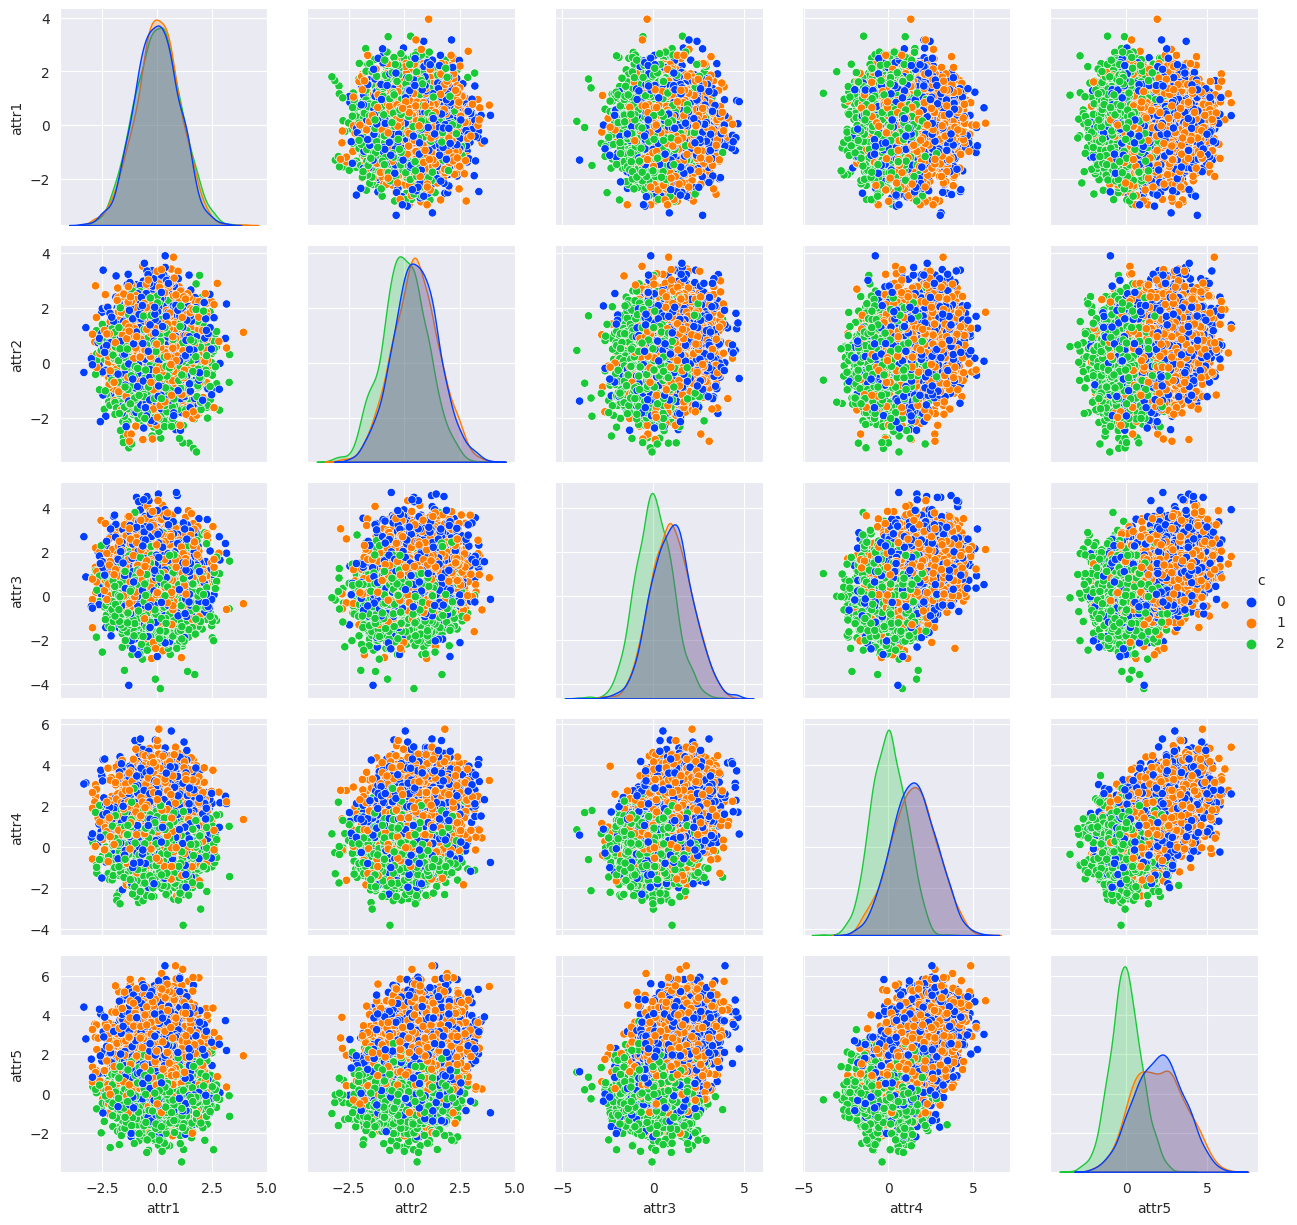

In [375]:
sns.pairplot(ds[columns], hue='c', palette='bright')
plt.plot()

In [ ]:
sns.pairplot(ds_cond[columns], hue='c', palette='bright')
plt.plot()

We will compare by fitting a 1-NN using the condensed training set and the control training set over the test set, and see the difference in term of performance.

In [376]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train_control, y_train_control)

y_pred_control = model.predict(X_test)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_cond, y_train_cond)
y_pred_cond = model.predict(X_test)

accuracy_control = accuracy_score(y_test, y_pred_control)
accuracy_cond = accuracy_score(y_test, y_pred_cond)

print(f'Accuracy on test for the control: {accuracy_control * 100:0.2f}%')
print(f'Accuracy on test after CNN: {accuracy_cond * 100:0.2f}%')
print(f'Difference: {accuracy_control*100 - accuracy_cond*100:0.2f}')

Accuracy on test for the control: 79.00%
Accuracy on test after CNN: 79.00%
Difference: 0.00


We did suffer a loss of accuracy after performing a CNN, although the accuracy stays high, with a loss of 2% after CNN
Let's tune k and compare the results between the original training set and the condensed training set

In [ ]:
optimal_k_cond = round(np.sqrt(X_train_cond.shape[0]))
optimal_k_cond

In [377]:
acc_cond, std_cond = tune(X_train_cond, y_train_cond.values.ravel(), k_min=1, k_max=100)

(4000, 21)
0.77525
0.76475
0.8052499999999998
0.79325
0.8115
0.8077500000000001
0.8225000000000001
0.8220000000000001
0.83375
0.8314999999999999
0.8317500000000001
0.836
0.8387499999999999
0.8365
0.8387499999999999
0.842
0.8412499999999999
0.843
0.8400000000000001
0.84375
0.84475
0.8474999999999999
0.8472500000000001
0.8474999999999999
0.8452500000000001
0.84825
0.8494999999999999
0.85175
0.8467500000000001
0.8494999999999999
0.8450000000000001
0.84925
0.8465
0.8504999999999999
0.8460000000000001
0.851
0.8487500000000001
0.85125
0.85
0.8505
0.8497499999999999
0.8524999999999998
0.85
0.85125
0.85
0.85125
0.8504999999999999
0.8547499999999999
0.8494999999999999
0.8532500000000001
0.8497499999999999
0.85125
0.8497499999999999
0.8539999999999999
0.851
0.853
0.8504999999999999
0.8530000000000001
0.853
0.8545
0.8532499999999998
0.8549999999999999
0.853
0.8554999999999999
0.8545
0.8557500000000001
0.8564999999999999
0.8564999999999999
0.8557500000000001
0.85825
0.8547499999999999
0.857
0.8557

In [ ]:
print(max(acc_cond), max(acc))
acc == acc_cond

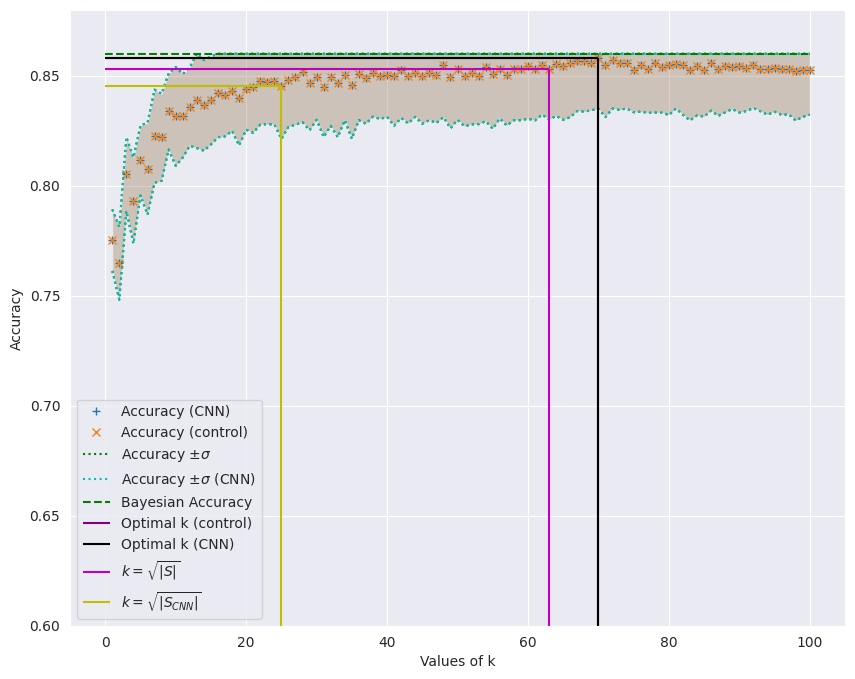

In [378]:

acc_plus_cond = np.add(acc_cond, std_cond)
acc_plus_cond[acc_plus_cond > 0.86] = 0.86
acc_minus_cond = np.subtract(acc_cond, std_cond)

fig, ax = plt.subplots(figsize=(10, 8))
xaxis = np.arange(0, 101, 1)
ax.plot(xaxis[1:], acc_cond[1:], '+', label='Accuracy (CNN)')
ax.plot(xaxis[1:], acc[1:], 'x', label='Accuracy (control)')

ax.plot(xaxis[1:], acc_plus[1:], 'g:',  label='Accuracy $\pm \sigma$')
ax.plot(xaxis[1:], acc_minus[1:], 'g:')
ax.fill_between(xaxis[1:], acc_plus[1:], acc_minus[1:], alpha=0.2)

ax.plot(xaxis[1:], acc_plus_cond[1:], 'c:', label='Accuracy $\pm \sigma$ (CNN)')
ax.plot(xaxis[1:], acc_minus_cond[1:], 'c:')
ax.fill_between(xaxis[1:], acc_plus_cond[1:], acc_minus_cond[1:], alpha=0.2)


ax.hlines(xmin=0, xmax=100, y=0.86, color='green', linestyle='--', label='Bayesian Accuracy')

ax.hlines(xmin=0, xmax=acc.index(max(acc)), y=max(acc), color='purple')
ax.hlines(xmin=0, xmax=theoretical_k, y=acc[theoretical_k], color='m')

ax.hlines(xmin=0, xmax=acc_cond.index(max(acc_cond)), y=max(acc_cond), color='k')
ax.hlines(xmin=0, xmax=optimal_k_cond, y=acc_cond[optimal_k_cond], color='y')
ax.vlines(ymin=0, ymax=max(acc), x=acc.index(max(acc)), color='purple', label='Optimal k (control)')
ax.vlines(ymin=0, ymax=max(acc_cond), x=acc_cond.index(max(acc_cond)), color='k', label='Optimal k (CNN)')
ax.vlines(ymin=0, ymax=acc[theoretical_k], x=theoretical_k, label='$k = \sqrt{|S|}$', color='m')
ax.vlines(ymin=0, ymax=acc_cond[optimal_k_cond], x=optimal_k_cond, label='$k =\sqrt{|S_{CNN}|}$', color='y')
plt.ylim(0.60, 0.88)
plt.xlabel('Values of k')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The accuracy of our model has a stronger standard deviation, and a lower accuracy. However the optimal k is lower, and computation time is faster.

The distribution of the points is the conserved, but the clouds of points are less dense, since the borders are enough to classify correctly (using 1-NN) the points from within the border.
Since there are clear overlaps between the different classes, even after reduction, the borders are not perfectly defined even after a CNN.

---

## PCA (Principal Component Analysis)

Method:

1. Normalize the data (0-mean value)
2. Covariance matrix
3. Eigenvectors and eigenvalues
4. Selection of principal components,
5. Data transformation (this step is to be applied to the test set as well)

In [510]:
def normalize(X: pd.DataFrame):
    mean = X.mean()
    std = X.std()
    normalized = (X - mean) / std
    return normalized

In [509]:
def find_eigen(X):
    cov = np.round(np.cov(X.T), 2)
    print(cov.shape)
    eig_val, eig_vec = np.linalg.eig(cov)
    indices = np.argsort(abs(eig_val))[::-1]
    eig_val = eig_val[indices]
    eig_vec = eig_vec[:,indices]
    print(eig_val.shape, eig_vec.shape)
    return eig_val, eig_vec

In [511]:
def explained_var(eig_val, min_exp_var = 0.97):
    # Get explained variance
    sum_eig_val = np.sum(eig_val)
    explained_variance = eig_val/ sum_eig_val
    print("Explained variance ", explained_variance)
    cumulative_variance = np.cumsum(explained_variance)
    print("Cumulative variance ", cumulative_variance)
    
    # Plot explained variance
    plt.plot(np.arange(0, len(explained_variance), 1), cumulative_variance)
    plt.xlabel("Number of components")
    plt.ylabel("Explained variance")
    plt.show()
    
    # We will keep k components, s.t we have the minimal k that makes explained variance above 0.95
    return np.argmax(cumulative_variance >= min_exp_var) + 1

In [522]:
def transform(X:pd.DataFrame, eig_vectors):
    transformed_data = X @ eig_vectors
    return transformed_data

In [513]:
def pipeline_pca(X_train, X_test):
    X_norm = normalize(X_train)
    eig_val, eig_vec = find_eigen(X_norm)
    k = explained_var(eig_val)
    print
    features = {j: f'attr{i}' for j, i in enumerate(range(1, k+1))}
    eig_vec = eig_vec[:, :k]
    X_train_t = transform(X_train, eig_vec).rename(columns=features)
    X_test_t = transform(X_test, eig_vec).rename(columns=features)
    return X_train_t, X_test_t
    

(21, 21)
(21,) (21, 21)
Explained variance  [0.37737762 0.15545534 0.04917315 0.04662796 0.04220338 0.04179927
 0.03306016 0.03215815 0.02417119 0.02286709 0.02026641 0.01906415
 0.01744103 0.01702511 0.01667442 0.01578203 0.01548453 0.01494093
 0.01450889 0.01223804 0.01168114]
Cumulative variance  [0.37737762 0.53283296 0.58200611 0.62863407 0.67083745 0.71263672
 0.74569688 0.77785503 0.80202623 0.82489331 0.84515973 0.86422388
 0.88166491 0.89869002 0.91536444 0.93114646 0.94663099 0.96157192
 0.97608082 0.98831886 1.        ]


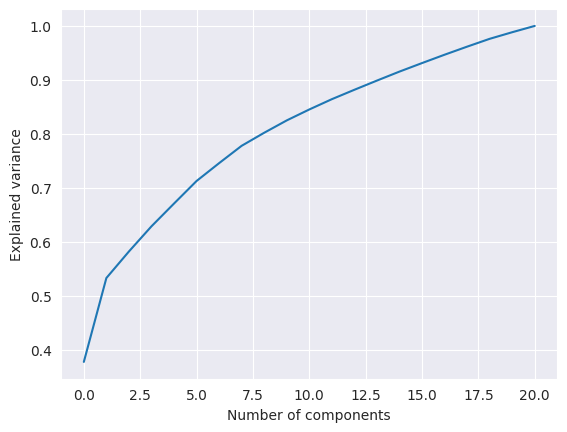

In [514]:
X_train_pca, X_test_pca = pipeline_pca(X_train, X_test)

In [515]:
print(X_test_pca.shape)

(1000, 19)


In [386]:
columns = X_train_pca.columns[0:5].tolist() + ['c']
ds_pca = pd.concat([X_train_pca, y_train_pca], axis=1)

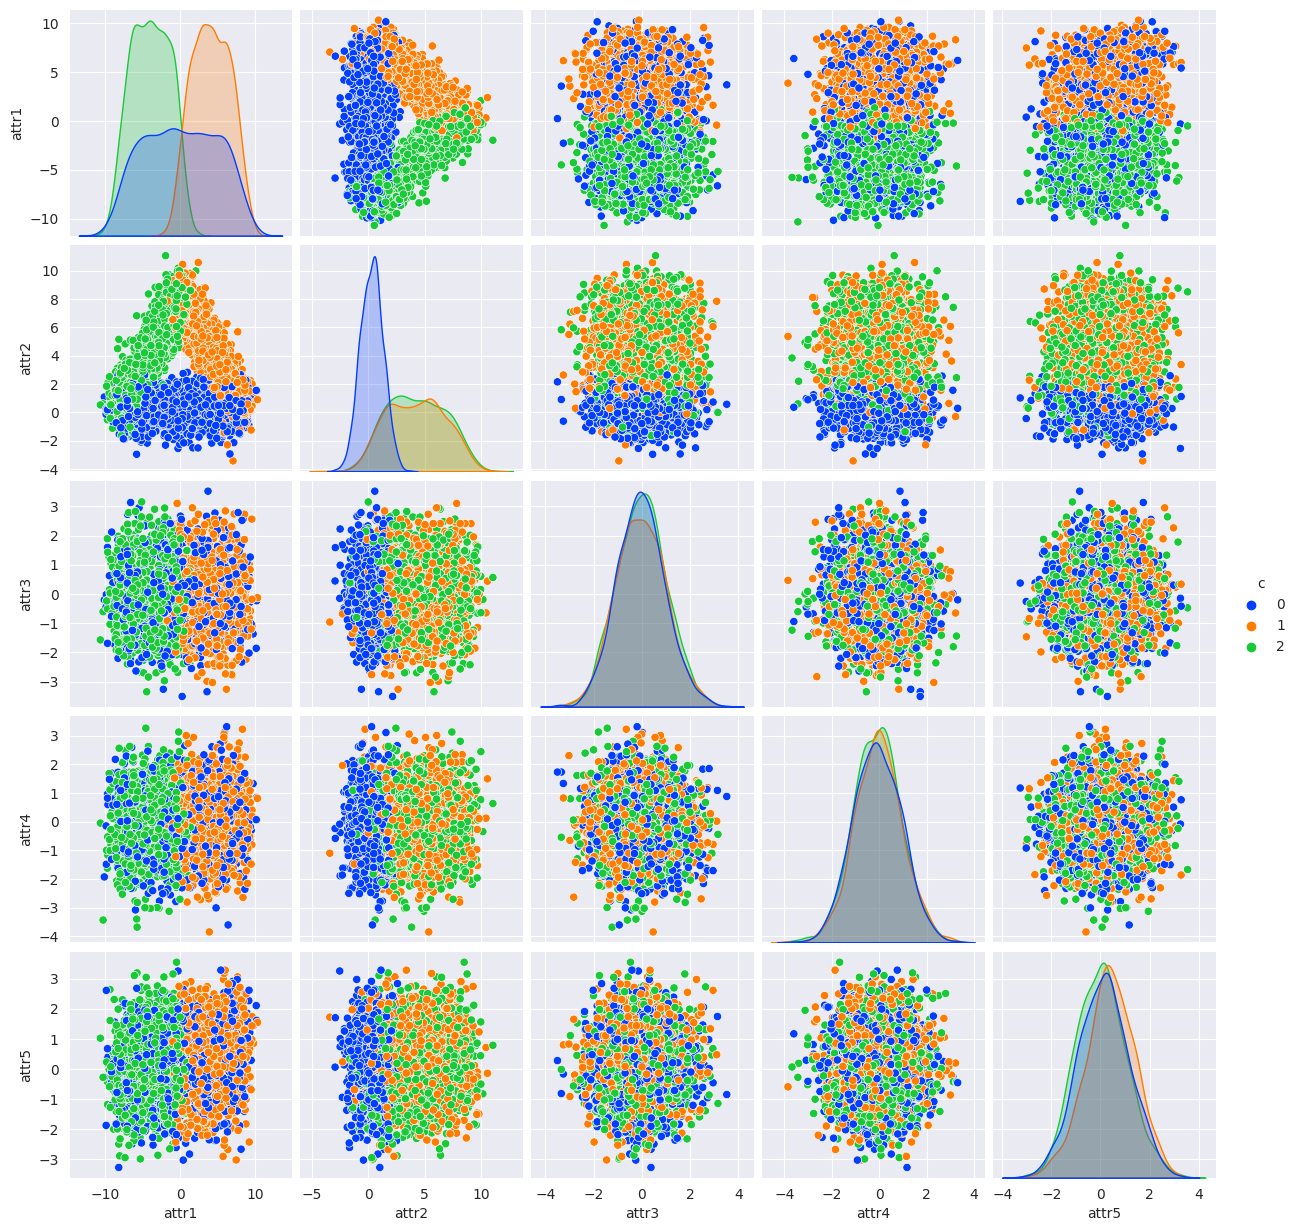

In [387]:
sns.pairplot(ds_pca[columns], hue='c', palette='bright')
plt.show()

In [ ]:
sns.pairplot(ds[columns], hue='c', palette='bright')
plt.plot()

In [388]:
X_train_pca.describe()

attr1        attr2        attr3        attr4        attr5  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     -0.042831     2.937878    -0.034561    -0.070005     0.178155   
std       4.782225     2.839238     1.016288     1.001772     1.039608   
min     -10.677345    -3.414142    -3.503683    -3.849917    -3.270045   
25%      -4.101718     0.602463    -0.731140    -0.757263    -0.525808   
50%      -0.177919     2.282057    -0.038742    -0.069887     0.178446   
75%       3.972582     5.258884     0.648182     0.589409     0.871896   
max      10.300819    11.051057     3.517130     3.310028     3.549081   

             attr6        attr7        attr8        attr9       attr10  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     -0.897867    -1.321765     0.597315    -0.787819    -2.699980   
std       1.024018     1.038929     1.073248     1.075526     1.006290   
min      -4.898460    -4.977781    -3.515328    -4.375754    -5.974853   
25%      -1.583569    -2.002115    -0.148587    -1.522717    -3.376791   
50%      -0.904233    -1.320743     0.562072    -0.795625    -2.708489   
75%      -0.204233    -0.622372     1.338726    -0.051497    -2.030744   
max       2.522191     2.647781     4.756897     2.737071     0.649772   

            attr11       attr12       attr13       attr14       attr15  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     -0.467943     0.084248    -2.692793    -2.551418     3.379038   
std       1.024726     1.012031     1.009867     0.998090     1.000187   
min      -4.281982    -4.411807    -6.198753    -6.442659     0.116530   
25%      -1.167509    -0.582202    -3.365883    -3.224233     2.695620   
50%      -0.465818     0.081193    -2.696209    -2.559541     3.384088   
75%       0.228627     0.751215    -2.026442    -1.871476     4.043766   
max       2.840469     4.290097     1.049703     0.639643     6.829368   

            attr16       attr17       attr18       attr19  
count  4000.000000  4000.000000  4000.000000  4000.000000  
mean      1.241560     3.637603    -1.428490     3.142109  
std       1.003676     1.015200     1.011073     0.998754  
min      -2.470778    -0.256339    -5.031898    -0.839872  
25%       0.577418     2.948404    -2.106287     2.468094  
50%       1.242957     3.645233    -1.421747     3.146122  
75%       1.923479     4.308898    -0.740781     3.818170  
max       5.311407     7.275009     1.962287     6.556483

---

## LDA (Linear Discriminant Analysis)

Method:

1.  Compute the mean vectors,
2.  Compute the within-class scatter matrix $S_W$
3.  Compute the between-class scatter matrix $S_B$
4.  Compute the matrix $S_W^{_1} \cdot S_B$ 
4.  Calculate the eigenvalues for the matrix $S_W^{_1} \cdot S_B$ (Linear Discriminants) 
5.  Select k best discriminants (k number of dimensions to keep)
6.  Transform (to be applied to the test set)

In [496]:
def scatter_matrix(X: pd.DataFrame, y: pd.DataFrame | pd.Series):
    if isinstance(y, pd.Series):
        y = y.to_frame()
    
    n_f = X.shape[1]
    classes = y['c'].unique()
    
    m = np.mean(X.values, axis=0)
    print(type(m))
    S_within = np.zeros((n_f, n_f))
    S_between = np.zeros((n_f, n_f))    
    for c in classes:
        X_c = X.loc[y['c'] == c]
        mean_c = np.mean(X_c.values, axis=0)
        
        S_within += (X_c - mean_c).T.dot((X_c - mean_c))
        
        n_c = X_c.shape[0]
        mean_diff = (mean_c - m).reshape(n_f, 1)
        
        S_between += n_c * (mean_diff).dot(mean_diff.T)
        # print(S_within)
    
    A = np.linalg.inv(S_within).dot(S_between)
    return A
    
    

In [538]:
def find_eigen_val(X):
    eig_val, eig_vec = np.linalg.eig(X)
    indices = np.argsort(abs(eig_val))[::-1]
    eig_val = np.real(eig_val[indices])
    eig_vec = np.real(eig_vec[:,indices])
    print(eig_val.shape, eig_vec.shape)
    return eig_val, eig_vec

In [561]:
def pipeline_lda(X, y, n_components = 18):
    A = scatter_matrix(X, y)
    
    eig_val, eig_vec = find_eigen_val(A)
    eig_vec = eig_vec[:, :n_components]
    return eig_val, eig_vec

In [562]:
eig_val_lda, eig_vec_lda = pipeline_lda(X_train, y_train)

<class 'numpy.ndarray'>
(21,) (21, 21)


In [563]:
features = {j: f'attr{i}' for j, i in enumerate(range(1, 19))}
X_train_lda = transform(X_train, eig_vec_lda).rename(columns=features)
X_test_lda = transform(X_test, eig_vec_lda).rename(columns=features)

In [564]:
X_train_lda.shape

(4000, 18)

In [565]:
X_test_lda

attr1     attr2     attr3     attr4     attr5     attr6     attr7  \
1501 -0.803355 -5.911387 -4.051854  1.868073  0.562644  2.836225  2.836225   
2586  2.348465 -3.706118 -3.687627 -1.624585  2.299266  0.969018  0.969018   
2653  5.441561 -4.243741 -5.237125  0.236383  2.571602  1.590030  1.590030   
1055 -2.138863  1.572159 -5.673491  2.570925  3.512587  2.951805  2.951805   
705   3.069253 -2.844733 -3.989426  1.551411  2.204014  3.360746  3.360746   
...        ...       ...       ...       ...       ...       ...       ...   
4711 -5.793518 -3.910207 -4.860007  1.774308  2.540154  2.605842  2.605842   
2313  4.744821 -0.124990 -4.693247  1.473531  1.897317  3.187219  3.187219   
3214  0.657360  1.007856 -6.057857  1.048833  3.469812  2.364239  2.364239   
2732 -3.602578 -1.612630 -5.576211  1.325392  3.604583  4.039260  4.039260   
1926 -1.204172 -5.883427 -5.176547 -0.747283  3.321383  0.520100  0.520100   

         attr8     attr9    attr10    attr11    attr12    attr13    attr14  \
1501 -1.963781 -1.166238  2.233998  2.233998  2.446341  2.446341  1.657731   
2586 -1.576023 -0.807014  0.508284  0.508284  1.499436  1.499436  1.316486   
2653 -0.979254 -0.287228  0.842768  0.842768  0.624962  0.624962  1.750797   
1055 -2.206910 -0.106129  2.738066  2.738066  0.637552  0.637552  3.174822   
705  -3.031610 -0.991323  0.850135  0.850135  1.863446  1.863446  3.002428   
...        ...       ...       ...       ...       ...       ...       ...   
4711 -2.764796 -0.859269  1.245796  1.245796  1.048622  1.048622  1.171077   
2313 -2.159410  0.061535  3.730955  3.730955  0.974367  0.974367  2.227774   
3214 -2.964379 -0.129946  0.372890  0.372890  1.759583  1.759583  2.934911   
2732 -3.593483 -0.116525  2.366460  2.366460  1.527832  1.527832  1.316573   
1926 -0.434817 -1.424886  0.603764  0.603764  1.466680  1.466680  1.275864   

        attr15    attr16    attr17    attr18  
1501 -1.997800 -1.997800 -2.412386 -2.412386  
2586 -0.318196 -0.318196 -0.829440 -0.829440  
2653 -1.061663 -1.061663 -0.713767 -0.713767  
1055 -2.530434 -2.530434 -0.769139 -0.769139  
705  -1.107145 -1.107145 -1.129548 -1.129548  
...        ...       ...       ...       ...  
4711 -0.409206 -0.409206 -0.555295 -0.555295  
2313 -3.938028 -3.938028 -1.991771 -1.991771  
3214 -0.346680 -0.346680 -1.232299 -1.232299  
2732 -2.407998 -2.407998 -1.386448 -1.386448  
1926 -0.528801 -0.528801 -1.452991 -1.452991  

[1000 rows x 18 columns]

In [566]:
ds_train_lda = pd.concat([X_train_lda, y_train], axis='columns')

[]

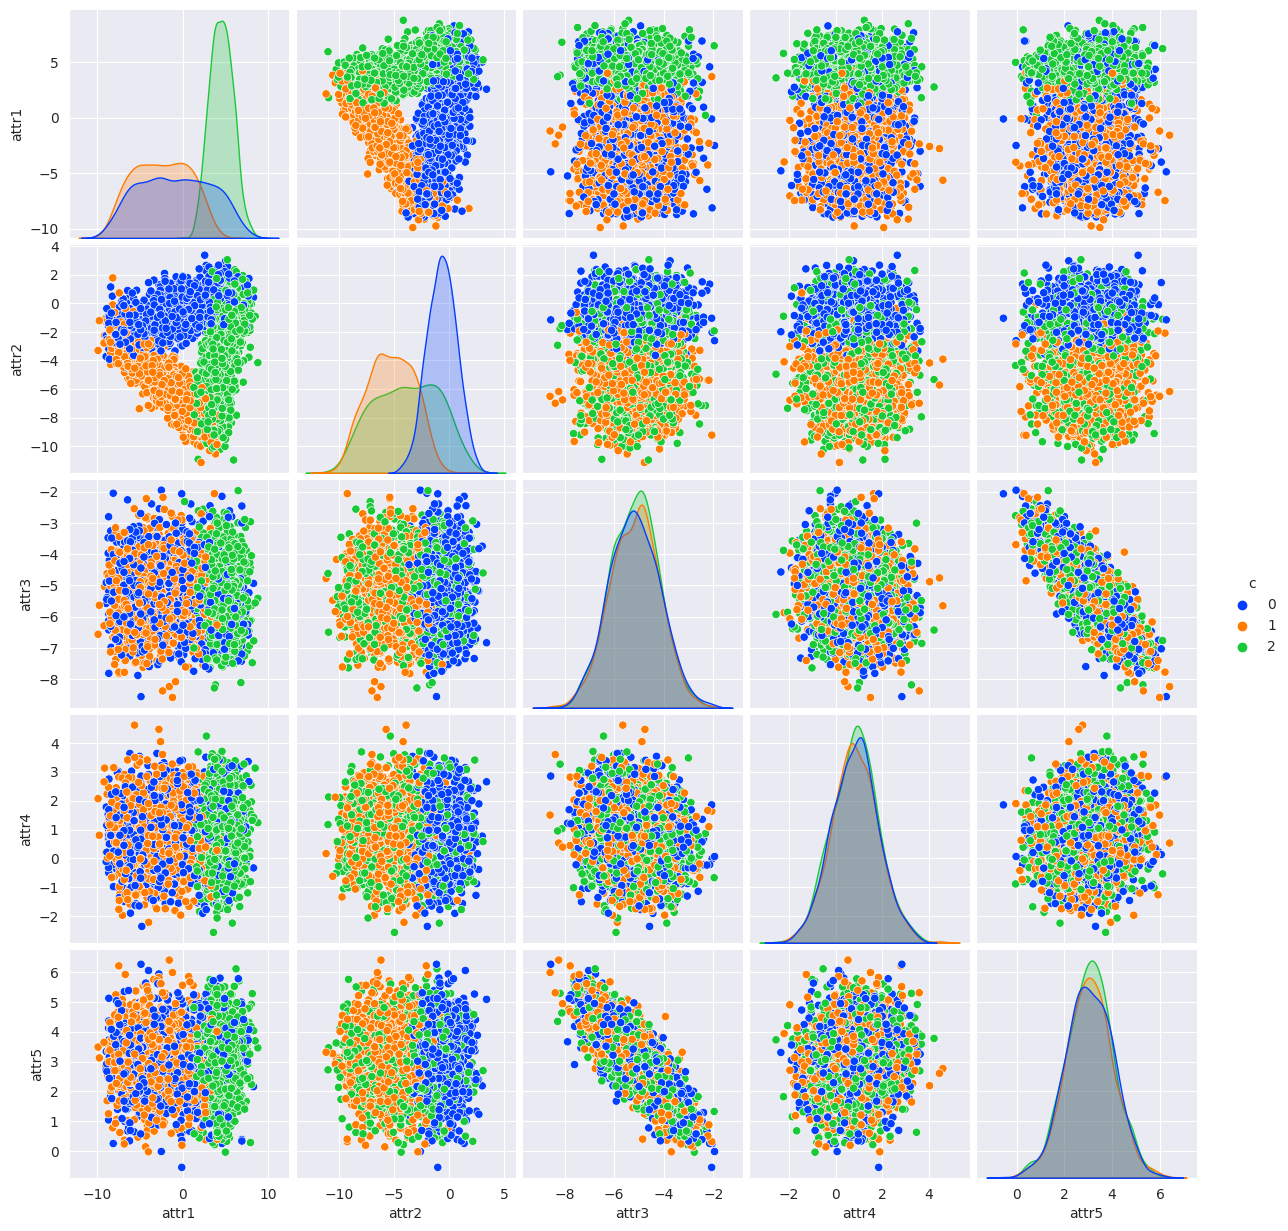

In [567]:
sns.pairplot(ds_train_lda[columns], hue='c', palette='bright')
plt.plot()

---

## Comparison between PCA / LDA / control